In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import scipy.io
import pandas as pd
import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats
import gsw

from glob import glob as gb
import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
input_path = '/g/data/e14/erd561/Australia_3/'

# blonw=122
# blone=138
# blats=-50
# blatn=-43

lonW = 122
lonE = 138
latN = -30
latS = -70

mld_z0_obs = xr.open_dataset(input_path + 'mld_z0_obs.nc').mld_z0_obs.\
sel(lon=slice(lonW, lonE)).sel(lat=slice(latS, latN)).mean('lon')
print(mld_z0_obs)
mld_z0_slope_obs = xr.open_dataset(input_path + 'mld_z0_slope_obs.nc').mld_z0_slope_obs.\
sel(lon=slice(lonW, lonE)).sel(lat=slice(latS, latN)).mean('lon')*10
print(mld_z0_slope_obs)
mld_z0_p_value_obs = xr.open_dataset(input_path + 'mld_z0_p_value_obs.nc').mld_z0_p_value_obs
print(mld_z0_p_value_obs)
mld_z0_std_err_obs = xr.open_dataset(input_path + 'mld_z0_std_err_obs.nc').mld_z0_std_err_obs*10
print(mld_z0_std_err_obs)

mld_z0_1_mod = xr.open_dataset(input_path + 'mld_z0_1_mod.nc').mld_z0_1_mod.\
sel(xt_ocean=slice(lonW, lonE)).sel(yt_ocean=slice(latS, latN)).mean('xt_ocean')
print(mld_z0_1_mod)
mld_z0_1_slope_mod = xr.open_dataset(input_path + 'mld_z0_1_slope_mod.nc').mld_z0_1_slope_mod.\
sel(xt_ocean=slice(lonW, lonE)).sel(yt_ocean=slice(latS, latN)).mean('xt_ocean')*10
print(mld_z0_1_slope_mod)
mld_z0_1_p_value_mod = xr.open_dataset(input_path + 'mld_z0_1_p_value_mod.nc').mld_z0_1_p_value_mod
print(mld_z0_1_p_value_mod)
mld_z0_1_std_err_mod = xr.open_dataset(input_path + 'mld_z0_1_std_err_mod.nc').mld_z0_1_std_err_mod*10
print(mld_z0_1_std_err_mod)

mld_z0_025_mod = xr.open_dataset(input_path + 'mld_z0_025_mod.nc').mld_z0_025_mod.\
sel(xt_ocean=slice(lonW, lonE)).sel(yt_ocean=slice(latS, latN)).mean('xt_ocean')
print(mld_z0_025_mod)
mld_z0_025_slope_mod = xr.open_dataset(input_path + 'mld_z0_025_slope_mod.nc').mld_z0_025_slope_mod.\
sel(xt_ocean=slice(lonW, lonE)).sel(yt_ocean=slice(latS, latN)).mean('xt_ocean')*10
print(mld_z0_025_slope_mod)
mld_z0_025_p_value_mod = xr.open_dataset(input_path + 'mld_z0_025_p_value_mod.nc').mld_z0_025_p_value_mod
print(mld_z0_025_p_value_mod)
mld_z0_025_std_err_mod = xr.open_dataset(input_path + 'mld_z0_025_std_err_mod.nc').mld_z0_025_std_err_mod*10
print(mld_z0_025_std_err_mod)

mld_z0_01_mod = xr.open_dataset(input_path + 'mld_z0_01_mod.nc').mld_z0_01_mod.\
sel(xt_ocean=slice(lonW, lonE)).sel(yt_ocean=slice(latS, latN)).mean('xt_ocean')
print(mld_z0_01_mod)
mld_z0_01_slope_mod = xr.open_dataset(input_path + 'mld_z0_01_slope_mod.nc').mld_z0_01_slope_mod.\
sel(xt_ocean=slice(lonW, lonE)).sel(yt_ocean=slice(latS, latN)).mean('xt_ocean')*10
print(mld_z0_01_slope_mod)
mld_z0_01_p_value_mod = xr.open_dataset(input_path + 'mld_z0_01_p_value_mod.nc').mld_z0_01_p_value_mod
print(mld_z0_01_p_value_mod)
mld_z0_01_std_err_mod = xr.open_dataset(input_path + 'mld_z0_01_std_err_mod.nc').mld_z0_01_std_err_mod*10
print(mld_z0_01_std_err_mod)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'mld_z0_obs' (lat: 36, year: 14)>
array([[ 42.89583333,  45.57291667,  45.67708333,  49.0625    ,
         50.578125  ,  48.0625    ,  53.75      ,  52.28125   ,
         55.16666667,  53.94270833,  50.24479167,  50.25520833,
         54.92708333,  44.        ],
       [ 44.49479167,  46.95833333,  46.375     ,  46.22395833,
         49.42708333,  47.97395833,  51.140625  ,  48.75      ,
         52.109375  ,  48.54166667,  48.234375  ,  48.54166667,
         53.50520833,  45.05729167],
       [ 53.71354167,  55.27083333,  56.44270833,  55.07291667,
         57.60416667,  56.421875  ,  58.80729167,  58.41666667,
         58.75520833,  58.734375  ,  54.609375  ,  58.23958333,
         61.09895833,  51.81770833],
       [ 66.984375  ,  67.76041667,  71.26041667,  67.90625   ,
         70.515625  ,  68.30729167,  73.40104167,  70.97916667,
         69.17708333,  72.109375  ,  66.59375   ,  71.18229167,
         75.15104167,  61.921875  ],
       [ 82.5       ,  81.59375 

<xarray.DataArray 'mld_z0_025_mod' (yt_ocean: 267, year: 14)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * yt_ocean  (yt_ocean) float64 -69.99 -69.88 -69.78 ... -30.56 -30.35 -30.13
  * year      (year) int64 2244 2245 2246 2247 2248 ... 2253 2254 2255 2256 2257
<xarray.DataArray 'mld_z0_025_slope_mod' (yt_ocean: 267)>
array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,

<xarray.DataArray 'mld_z0_01_p_value_mod' (yt_ocean: 1186, xt_ocean: 900)>
[1067400 values with dtype=float64]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -70.0 -69.96 -69.92 ... 19.75 19.84 19.94
  * xt_ocean  (xt_ocean) float64 90.05 90.15 90.25 90.35 ... 179.8 179.9 180.0
<xarray.DataArray 'mld_z0_01_std_err_mod' (yt_ocean: 1186, xt_ocean: 900)>
array([[       nan,        nan,        nan, ..., 4.85509345, 4.78898383,
        5.09065658],
       [       nan,        nan,        nan, ..., 9.13316851, 7.57177241,
        6.15361981],
       [       nan,        nan,        nan, ..., 5.51373833, 7.94364508,
        9.46437502],
       ...,
       [1.30491906, 1.15795027, 0.91219329, ..., 2.01660084, 2.29046729,
        2.30943012],
       [1.10313735, 0.88638498, 0.72744746, ..., 1.4779184 , 1.74517998,
        1.88055871],
       [0.79068334, 0.73730254, 0.60770244, ..., 1.30595728, 1.43743633,
        1.65318905]])
Coordinates:
  * yt_ocean  (yt_ocean) float64 -70.0 -69.96 -69.92 ... 

In [4]:
# blonw=122
# blone=138
# blats=-50
# blatn=-43

lonW = 122
lonE = 138
latN = -30
latS = -70

input_path = '/g/data/e14/erd561/ARGO/'
temp_LTM = xr.open_dataset(input_path + 'RG_ArgoClim_Temperature_2017.nc', decode_times=False).\
                ARGO_TEMPERATURE_MEAN.\
                sel(LONGITUDE=slice(lonW, lonE)).\
                sel(LATITUDE=slice(latS, latN))
print(temp_LTM)


temp_months = xr.open_dataset(input_path + 'RG_ArgoClim_Temperature_2017.nc', decode_times=False).\
                ARGO_TEMPERATURE_ANOMALY.\
                sel(LONGITUDE=slice(lonW, lonE)).\
                sel(LATITUDE=slice(latS, latN))
# print(temp_months)

TIME = [pd.date_range('15/1/2004',periods=156, freq=pd.DateOffset(months=1))]
# print(TIME)

temp_months = temp_months.assign_coords(TIME=np.squeeze(TIME))
# print(temp_months)

temp = temp_months.groupby('TIME.year').mean('TIME', skipna=True)
# print(temp)

temp_2004_2016 = temp.sel(year=slice(1993,2017))
print(temp_2004_2016)



temp_2017 = xr.open_mfdataset(sorted(gb(input_path + 'RG_ArgoClim_2017*.nc')), decode_times=False).\
                ARGO_TEMPERATURE_ANOMALY.\
                sel(LONGITUDE=slice(lonW, lonE)).\
                sel(LATITUDE=slice(latS, latN)).\
                assign_coords(TIME=np.squeeze([pd.date_range('15/1/2017',periods=12, freq=pd.DateOffset(months=1))])).\
                groupby('TIME.year').mean('TIME', skipna=True)
temp_2017.load()
print(temp_2017)


temp = xr.concat([temp_2004_2016, temp_2017], dim='year') + temp_LTM
# print(temp)

temp = temp.assign_coords(PRESSURE=gsw.z_from_p(temp.PRESSURE, np.mean(temp.LATITUDE))).mean('LONGITUDE')
print(temp)

year = temp.year
depth = temp.PRESSURE
lat = temp.LATITUDE

# temp_trans = np.transpose(temp, (2,1,0))
temp_trans = temp
print(np.shape(temp_trans))
temp_slope = xr.DataArray(
    np.zeros([np.shape(depth)[0], np.shape(lat)[0]]), dims=(
    'depth', 'lat'), coords=[depth, lat], name='temp')
temp_p_value = xr.DataArray(
    np.zeros([np.shape(depth)[0], np.shape(lat)[0]]), dims=(
    'depth', 'lat'), coords=[depth, lat], name='temp')
temp_std_err = xr.DataArray(
    np.zeros([np.shape(depth)[0], np.shape(lat)[0]]), dims=(
    'depth', 'lat'), coords=[depth, lat], name='temp')
for iid, i in enumerate(depth):
    for jid, j in enumerate(lat):
        temp_slope[iid, jid], _, _, temp_p_value[iid, jid], temp_std_err[iid, jid] = \
        stats.linregress(year, temp_trans[:, iid, jid])
    print('depth ' + str(np.array(i)))
print(temp_slope)

temp_slope *= 10

<xarray.DataArray 'ARGO_TEMPERATURE_MEAN' (PRESSURE: 58, LATITUDE: 35, LONGITUDE: 16)>
array([[[-1.028, -0.997, ..., -1.09 , -1.072],
        [-0.733, -0.695, ..., -0.685, -0.677],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       [[-1.034, -1.001, ..., -1.091, -1.074],
        [-0.743, -0.704, ..., -0.688, -0.679],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       ...,

       [[ 0.178,  0.191, ...,  0.265,  0.283],
        [ 0.454,  0.489, ...,  0.652,  0.65 ],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       [[ 0.144,  0.152, ...,  0.238,  0.251],
        [ 0.406,  0.433, ...,  0.589,  0.59 ],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 122.5 123.5 124.5 125.5 .

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/g/data3/hh5/public/apps/miniconda3/envs/analysis

<xarray.DataArray 'ARGO_TEMPERATURE_ANOMALY' (year: 1, PRESSURE: 58, LATITUDE: 35, LONGITUDE: 16)>
array([[[[ 0.14574997,  0.14241666,  0.13616669, ...,  0.16658328,
           0.1704166 ,  0.16849995],
         [ 0.16091673,  0.16116671,  0.1388333 , ...,  0.23650007,
           0.21874996,  0.20200002],
         [ 0.2263333 ,  0.21266668,  0.15274997, ...,  0.2891667 ,
           0.29149997,  0.28025007],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        [[ 0.14733331,  0.14391665,  0.13833337, ...,  0.16808331,
           0.17124999,  0.16874997],
         [ 0.16241662,  0.16366665,  0.1415    , ...,  0.23633325,
           0.21883333,  0.20241673],
         [ 0.22908334,  0.21641667,  0.1571666 , ...,

depth -9.916314553182042
depth -19.83214764009724
depth -29.747499409319932
depth -39.66237000938222
depth -49.57675958877398
depth -59.49066829594285
depth -69.4040962792942
depth -79.31704368719117
depth -89.22951066795466
depth -99.14149736986326
depth -109.05300394115326
depth -118.96403053001883
depth -128.8745772846116
depth -138.7846443530411
depth -148.69423188337453
depth -158.60334002363672
depth -168.5119689218102
depth -180.89708133571355
depth -198.23498164298923
depth -218.04792995777368
depth -237.85896485218612
depth -257.6680875075464
depth -277.4752991044958
depth -297.2806008229981
depth -317.08399384233803
depth -336.8854793411216
depth -356.6850584972761
depth -376.4827324880494
depth -396.2785024900104
depth -416.0723696790479
depth -435.86433523037067
depth -458.1280248866778
depth -495.22883379993937
depth -544.6862064410487
depth -594.1317414837682
depth -643.5654572029547
depth -692.987371846814
depth -742.3975036368763
depth -791.7958707679738
depth -841.1824

In [5]:
# blonw=122
# blone=138
# blats=-50
# blatn=-43

lonW = 122
lonE = 138
latN = -30
latS = -70
input_path = '/g/data/e14/erd561/ARGO/'
salt_LTM = xr.open_dataset(input_path + 'RG_ArgoClim_Salinity_2017.nc', decode_times=False).\
                ARGO_SALINITY_MEAN.\
                sel(LONGITUDE=slice(lonW, lonE)).\
                sel(LATITUDE=slice(latS, latN))
print(salt_LTM)


salt_months = xr.open_dataset(input_path + 'RG_ArgoClim_Salinity_2017.nc', decode_times=False).\
                ARGO_SALINITY_ANOMALY.\
                sel(LONGITUDE=slice(lonW, lonE)).\
                sel(LATITUDE=slice(latS, latN))
# print(salt_months)

TIME = [pd.date_range('15/1/2004',periods=156, freq=pd.DateOffset(months=1))]
# print(TIME)

salt_months = salt_months.assign_coords(TIME=np.squeeze(TIME))
# print(salt_months)

salt = salt_months.groupby('TIME.year').mean('TIME', skipna=True)
# print(salt)

salt_2004_2016 = salt.sel(year=slice(1993,2017))
print(salt_2004_2016)



salt_2017 = xr.open_mfdataset(sorted(gb(input_path + 'RG_ArgoClim_2017*.nc')), decode_times=False).\
                ARGO_SALINITY_ANOMALY.\
                sel(LONGITUDE=slice(lonW, lonE)).\
                sel(LATITUDE=slice(latS, latN)).\
                assign_coords(TIME=np.squeeze([pd.date_range('15/1/2017',periods=12, freq=pd.DateOffset(months=1))])).\
                groupby('TIME.year').mean('TIME', skipna=True)
salt_2017.load()
print(salt_2017)


salt = xr.concat([salt_2004_2016, salt_2017], dim='year') + salt_LTM
# print(salt)

salt = salt.assign_coords(PRESSURE=gsw.z_from_p(salt.PRESSURE, np.mean(salt.LATITUDE))).mean('LONGITUDE')
print(salt)

year = salt.year
depth = salt.PRESSURE
lat = salt.LATITUDE

# salt_trans = np.transpose(salt, (2,1,0))
salt_trans = salt
print(np.shape(salt_trans))
salt_slope = xr.DataArray(
    np.zeros([np.shape(depth)[0], np.shape(lat)[0]]), dims=(
    'depth', 'lat'), coords=[depth, lat], name='salt')
salt_p_value = xr.DataArray(
    np.zeros([np.shape(depth)[0], np.shape(lat)[0]]), dims=(
    'depth', 'lat'), coords=[depth, lat], name='salt')
salt_std_err = xr.DataArray(
    np.zeros([np.shape(depth)[0], np.shape(lat)[0]]), dims=(
    'depth', 'lat'), coords=[depth, lat], name='salt')
for iid, i in enumerate(depth):
    for jid, j in enumerate(lat):
        salt_slope[iid, jid], _, _, salt_p_value[iid, jid], salt_std_err[iid, jid] = \
        stats.linregress(year, salt_trans[:, iid, jid])
    print('depth ' + str(np.array(i)))
print(salt_slope)

salt_slope *= 10

<xarray.DataArray 'ARGO_SALINITY_MEAN' (PRESSURE: 58, LATITUDE: 35, LONGITUDE: 16)>
array([[[34.073, 34.072, ..., 33.998, 33.991],
        [34.012, 34.006, ..., 33.917, 33.919],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       [[34.08 , 34.078, ..., 34.002, 33.995],
        [34.016, 34.01 , ..., 33.92 , 33.921],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       ...,

       [[34.674, 34.675, ..., 34.679, 34.68 ],
        [34.69 , 34.692, ..., 34.699, 34.699],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       [[34.673, 34.674, ..., 34.678, 34.679],
        [34.688, 34.69 , ..., 34.696, 34.696],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 122.5 123.5 124.5 125.5 ... 

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/g/data3/hh5/public/apps/miniconda3/envs/analysis

<xarray.DataArray 'ARGO_SALINITY_ANOMALY' (year: 1, PRESSURE: 58, LATITUDE: 35, LONGITUDE: 16)>
array([[[[ 1.16666676e-02,  1.02499975e-02,  7.41666788e-03, ...,
           1.54166641e-02,  9.99999791e-03,  3.08333593e-03],
         [ 9.33333021e-03,  6.50000433e-03,  3.41666606e-03, ...,
           4.99998510e-04, -1.24999636e-03, -2.24999967e-03],
         [ 2.16666353e-03,  1.08333433e-03,  9.16665420e-04, ...,
           3.58333252e-03,  2.58333236e-03,  3.50000081e-03],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[ 1.15000010e-02,  9.83333588e-03,  7.08333543e-03, ...,
           1.44999987e-02,  9.41666495e-03,  2.6666659

depth -9.916314553182042
depth -19.83214764009724
depth -29.747499409319932
depth -39.66237000938222
depth -49.57675958877398
depth -59.49066829594285
depth -69.4040962792942
depth -79.31704368719117
depth -89.22951066795466
depth -99.14149736986326
depth -109.05300394115326
depth -118.96403053001883
depth -128.8745772846116
depth -138.7846443530411
depth -148.69423188337453
depth -158.60334002363672
depth -168.5119689218102
depth -180.89708133571355
depth -198.23498164298923
depth -218.04792995777368
depth -237.85896485218612
depth -257.6680875075464
depth -277.4752991044958
depth -297.2806008229981
depth -317.08399384233803
depth -336.8854793411216
depth -356.6850584972761
depth -376.4827324880494
depth -396.2785024900104
depth -416.0723696790479
depth -435.86433523037067
depth -458.1280248866778
depth -495.22883379993937
depth -544.6862064410487
depth -594.1317414837682
depth -643.5654572029547
depth -692.987371846814
depth -742.3975036368763
depth -791.7958707679738
depth -841.1824

In [6]:
input_path = '/g/data/e14/erd561/Australia_3/'

temp_xm128_1_mod = xr.open_dataset(input_path + 'temp_xm128_1_mod.nc').temp_xm128_1_mod
print(temp_xm128_1_mod)
temp_xm128_1_slope_mod = xr.open_dataset(input_path + 'temp_xm128_1_slope_mod.nc').temp_xm128_1_slope_mod*10
print(temp_xm128_1_slope_mod)
temp_xm128_1_p_value_mod = xr.open_dataset(input_path + 'temp_xm128_1_p_value_mod.nc').temp_xm128_1_p_value_mod
print(temp_xm128_1_p_value_mod)
temp_xm128_1_std_err_mod = xr.open_dataset(input_path + 'temp_xm128_1_std_err_mod.nc').temp_xm128_1_std_err_mod*10
print(temp_xm128_1_std_err_mod)

temp_xm128_025_mod = xr.open_dataset(input_path + 'temp_xm128_025_mod.nc').temp_xm128_025_mod
print(temp_xm128_025_mod)
temp_xm128_025_slope_mod = xr.open_dataset(input_path + 'temp_xm128_025_slope_mod.nc').temp_xm128_025_slope_mod*10
print(temp_xm128_025_slope_mod)
temp_xm128_025_p_value_mod = xr.open_dataset(input_path + 'temp_xm128_025_p_value_mod.nc').temp_xm128_025_p_value_mod
print(temp_xm128_025_p_value_mod)
temp_xm128_025_std_err_mod = xr.open_dataset(input_path + 'temp_xm128_025_std_err_mod.nc').temp_xm128_025_std_err_mod*10
print(temp_xm128_025_std_err_mod)

temp_xm128_01_mod = xr.open_dataset(input_path + 'temp_xm128_01_mod.nc').temp_xm128_01_mod
print(temp_xm128_01_mod)
temp_xm128_01_slope_mod = xr.open_dataset(input_path + 'temp_xm128_01_slope_mod.nc').temp_xm128_01_slope_mod*10
print(temp_xm128_01_slope_mod)
temp_xm128_01_p_value_mod = xr.open_dataset(input_path + 'temp_xm128_01_p_value_mod.nc').temp_xm128_01_p_value_mod
print(temp_xm128_01_p_value_mod)
temp_xm128_01_std_err_mod = xr.open_dataset(input_path + 'temp_xm128_01_std_err_mod.nc').temp_xm128_01_std_err_mod*10
print(temp_xm128_01_std_err_mod)

salt_xm128_1_mod = xr.open_dataset(input_path + 'salt_xm128_1_mod.nc').salt_xm128_1_mod
print(salt_xm128_1_mod)
salt_xm128_1_slope_mod = xr.open_dataset(input_path + 'salt_xm128_1_slope_mod.nc').salt_xm128_1_slope_mod*10
print(salt_xm128_1_slope_mod)
salt_xm128_1_p_value_mod = xr.open_dataset(input_path + 'salt_xm128_1_p_value_mod.nc').salt_xm128_1_p_value_mod
print(salt_xm128_1_p_value_mod)
salt_xm128_1_std_err_mod = xr.open_dataset(input_path + 'salt_xm128_1_std_err_mod.nc').salt_xm128_1_std_err_mod*10
print(salt_xm128_1_std_err_mod)

salt_xm128_025_mod = xr.open_dataset(input_path + 'salt_xm128_025_mod.nc').salt_xm128_025_mod
print(salt_xm128_025_mod)
salt_xm128_025_slope_mod = xr.open_dataset(input_path + 'salt_xm128_025_slope_mod.nc').salt_xm128_025_slope_mod*10
print(salt_xm128_025_slope_mod)
salt_xm128_025_p_value_mod = xr.open_dataset(input_path + 'salt_xm128_025_p_value_mod.nc').salt_xm128_025_p_value_mod
print(salt_xm128_025_p_value_mod)
salt_xm128_025_std_err_mod = xr.open_dataset(input_path + 'salt_xm128_025_std_err_mod.nc').salt_xm128_025_std_err_mod*10
print(salt_xm128_025_std_err_mod)

salt_xm128_01_mod = xr.open_dataset(input_path + 'salt_xm128_01_mod.nc').salt_xm128_01_mod
print(salt_xm128_01_mod)
salt_xm128_01_slope_mod = xr.open_dataset(input_path + 'salt_xm128_01_slope_mod.nc').salt_xm128_01_slope_mod*10
print(salt_xm128_01_slope_mod)
salt_xm128_01_p_value_mod = xr.open_dataset(input_path + 'salt_xm128_01_p_value_mod.nc').salt_xm128_01_p_value_mod
print(salt_xm128_01_p_value_mod)
salt_xm128_01_std_err_mod = xr.open_dataset(input_path + 'salt_xm128_01_std_err_mod.nc').salt_xm128_01_std_err_mod*10
print(salt_xm128_01_std_err_mod)

<xarray.DataArray 'temp_xm128_1_mod' (st_ocean: 35, yt_ocean: 51, year: 14)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * st_ocean  (st_ocean) float64 -1.152 -3.649 -6.565 ... -1.854e+03 -2.046e+03
  * yt_ocean  (yt_ocean) float64 -69.63 -69.18 -68.71 ... -32.5 -31.5 -30.5
  * year      (year) int64 2004 2005 2006 2007 2008 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'temp_x

<xarray.DataArray 'salt_xm128_1_std_err_mod' (st_ocean: 35, yt_ocean: 51)>
array([[       nan,        nan,        nan, ..., 0.02498076,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.02494027,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.02489232,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * st_ocean  (st_ocean) float64 -1.152 -3.649 -6.565 ... -1.854e+03 -2.046e+03
  * yt_ocean  (yt_ocean) float64 -69.63 -69.18 -68.71 ... -32.5 -31.5 -30.5
<xarray.DataArray 'salt_xm128_025_mod' (st_ocean: 35, yt_ocean: 267, year: 14)>
[130830 values with dtype=float32]
Coordinates:
  * st_ocean  (st_ocean) float64 -1.152 -3.649 -6.5

In [16]:
lonW = 122
lonE = 138
latN = -30
latS = -70

tau_x_z0_1_mod = xr.open_dataset(input_path + 'v2/tau_x_z0_1_mod.nc').tau_x_z0_1_mod.mean('year')
print(tau_x_z0_1_mod)
tau_x_z0_1_slope_mod = xr.open_dataset(input_path + 'v2/tau_x_z0_1_slope_mod.nc').tau_x_z0_1_slope_mod*10
print(tau_x_z0_1_slope_mod)

tau_x_z0_025_mod = xr.open_dataset(input_path + 'v2/tau_x_z0_025_mod.nc').tau_x_z0_025_mod.mean('year')
print(tau_x_z0_025_mod)
tau_x_z0_025_slope_mod = xr.open_dataset(input_path + 'v2/tau_x_z0_025_slope_mod.nc').tau_x_z0_025_slope_mod*10
print(tau_x_z0_025_slope_mod)

tau_x_z0_01_mod = xr.open_dataset(input_path + 'v2/tau_x_z0_01_mod.nc').tau_x_z0_01_mod.mean('year')
print(tau_x_z0_01_mod)
tau_x_z0_01_slope_mod = xr.open_dataset(input_path + 'v2/tau_x_z0_01_slope_mod.nc').tau_x_z0_01_slope_mod*10
print(tau_x_z0_01_slope_mod)

tau_y_z0_1_mod = xr.open_dataset(input_path + 'v2/tau_y_z0_1_mod.nc').tau_y_z0_1_mod.mean('year')
print(tau_y_z0_1_mod)
tau_y_z0_1_slope_mod = xr.open_dataset(input_path + 'v2/tau_y_z0_1_slope_mod.nc').tau_y_z0_1_slope_mod*10
print(tau_y_z0_1_slope_mod)

tau_y_z0_025_mod = xr.open_dataset(input_path + 'v2/tau_y_z0_025_mod.nc').tau_y_z0_025_mod.mean('year')
print(tau_y_z0_025_mod)
tau_y_z0_025_slope_mod = xr.open_dataset(input_path + 'v2/tau_y_z0_025_slope_mod.nc').tau_y_z0_025_slope_mod*10
print(tau_y_z0_025_slope_mod)

tau_y_z0_01_mod = xr.open_dataset(input_path + 'v2/tau_y_z0_01_mod.nc').tau_y_z0_01_mod.mean('year')
print(tau_y_z0_01_mod)
tau_y_z0_01_slope_mod = xr.open_dataset(input_path + 'v2/tau_y_z0_01_slope_mod.nc').tau_y_z0_01_slope_mod*10
print(tau_y_z0_01_slope_mod)

pme_river_z0_1_mod = xr.open_dataset(input_path + 'v2/pme_river_z0_1_mod.nc').pme_river_z0_1_mod.mean('year')
print(pme_river_z0_1_mod)
pme_river_z0_1_slope_mod = xr.open_dataset(input_path + 'v2/pme_river_z0_1_slope_mod.nc').pme_river_z0_1_slope_mod*10
print(pme_river_z0_1_slope_mod)

pme_river_z0_025_mod = xr.open_dataset(input_path + 'v2/pme_river_z0_025_mod.nc').pme_river_z0_025_mod.mean('year')
print(pme_river_z0_025_mod)
pme_river_z0_025_slope_mod = xr.open_dataset(input_path + 'v2/pme_river_z0_025_slope_mod.nc').pme_river_z0_025_slope_mod*10
print(pme_river_z0_025_slope_mod)

pme_river_z0_01_mod = xr.open_dataset(input_path + 'v2/pme_river_z0_01_mod.nc').pme_river_z0_01_mod.mean('year')
print(pme_river_z0_01_mod)
pme_river_z0_01_slope_mod = xr.open_dataset(input_path + 'v2/pme_river_z0_01_slope_mod.nc').pme_river_z0_01_slope_mod*10
print(pme_river_z0_01_slope_mod)

evap_z0_1_mod = xr.open_dataset(input_path + 'v2/evap_z0_1_mod.nc').evap_z0_1_mod.mean('year')
print(evap_z0_1_mod)
evap_z0_1_slope_mod = xr.open_dataset(input_path + 'v2/evap_z0_1_slope_mod.nc').evap_z0_1_slope_mod*10
print(evap_z0_1_slope_mod)

evap_z0_025_mod = xr.open_dataset(input_path + 'v2/evap_z0_025_mod.nc').evap_z0_025_mod.mean('year')
print(evap_z0_025_mod)
evap_z0_025_slope_mod = xr.open_dataset(input_path + 'v2/evap_z0_025_slope_mod.nc').evap_z0_025_slope_mod*10
print(evap_z0_025_slope_mod)

evap_z0_01_mod = xr.open_dataset(input_path + 'v2/evap_z0_01_mod.nc').evap_z0_01_mod.mean('year')
print(evap_z0_01_mod)
evap_z0_01_slope_mod = xr.open_dataset(input_path + 'v2/evap_z0_01_slope_mod.nc').evap_z0_01_slope_mod*10
print(evap_z0_01_slope_mod)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'tau_x_z0_1_mod' (yu_ocean: 91, xu_ocean: 91)>
array([[        nan,         nan,         nan, ..., -0.01000525,
        -0.00549035, -0.00192362],
       [        nan,         nan,         nan, ..., -0.00938376,
        -0.00422436,  0.0004902 ],
       [        nan,         nan,         nan, ...,  0.00142025,
         0.00648589,  0.0111011 ],
       ...,
       [ 0.01433778,  0.01292127,  0.01196296, ..., -0.06790073,
        -0.06859446, -0.06911617],
       [ 0.01399891,  0.01220819,  0.01088451, ..., -0.06625836,
        -0.0670611 , -0.06755902],
       [ 0.01296545,  0.01053304,  0.00852475, ..., -0.06391291,
        -0.06425041, -0.06453306]], dtype=float32)
Coordinates:
  * yu_ocean  (yu_ocean) float64 -69.85 -68.94 -67.98 ... 18.22 18.97 19.76
  * xu_ocean  (xu_ocean) float64 90.0 91.0 92.0 93.0 ... 177.0 178.0 179.0 180.0
<xarray.DataArray 'tau_x_z0_1_slope_mod' (yu_ocean: 91, xu_ocean: 91)>
array([[        nan,         nan,         nan, ..., -0.00390402,
 

<xarray.DataArray 'tau_y_z0_01_slope_mod' (yu_ocean: 91, xu_ocean: 91)>
array([[        nan,         nan,         nan, ..., -0.01221698,
        -0.0147594 , -0.0172694 ],
       [        nan,         nan,         nan, ..., -0.01923427,
        -0.01849852, -0.02080532],
       [        nan,         nan,         nan, ..., -0.01685031,
        -0.02168276, -0.02230773],
       ...,
       [-0.00475976, -0.00357294, -0.00289584, ..., -0.00380036,
        -0.00366371, -0.00375594],
       [-0.00457849, -0.00304988, -0.00188565, ..., -0.00333054,
        -0.00368351, -0.00384346],
       [-0.00465855, -0.00294773, -0.00094229, ..., -0.00330823,
        -0.00321573, -0.00343943]])
Coordinates:
  * yu_ocean  (yu_ocean) float64 -70.02 -69.01 -67.99 ... 18.0 19.04 19.98
  * xu_ocean  (xu_ocean) float64 90.0 91.0 92.0 93.0 ... 177.0 178.0 179.0 180.0
<xarray.DataArray 'pme_river_z0_1_mod' (yt_ocean: 91, xt_ocean: 91)>
array([[           nan,            nan,            nan, ...,
        -4.80947

In [15]:
latS = -70
latN = 20
lonW = 90-360
lonE = 180-360

var = 'rain'

all_files = sorted(gb('/g/data/e14/erd561/JRA55-do/v1-3/' + var + '.*.*.nc'))

rain_all = xr.open_mfdataset(all_files).prrn

rain_all.load()
print(rain_all)

rain = rain_all.groupby('time.year').mean('time', skipna=True)
print(rain)
rain = rain.sel(year=slice(1993,2017))
print(rain)
# rain_anom = rain - rain_mean

latitude = rain.latitude
longitude = rain.longitude
years = rain.year

rain_slopes = xr.DataArray(np.zeros([latitude.shape[0], longitude.shape[0]]), dims=(
    'latitude', 'longitude'), coords=[latitude, longitude], name='prrn')
for iid, i in enumerate(latitude):
    for jid, j in enumerate(longitude):
        rain_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(years, rain[:, iid, jid])
    print('latitude ' + str(np.array(i)))
print(rain_slopes)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  # Remove the CWD from sys.path while we load stuff.
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=T

<xarray.DataArray 'prrn' (time: 25, latitude: 161, longitude: 161)>
array([[[9.61703162e-09, 8.33704394e-09, 1.16806307e-08, ...,
         1.95716962e-06, 1.90590833e-06, 1.84341297e-06],
        [9.56960111e-09, 7.65600028e-09, 1.01441593e-08, ...,
         2.23245797e-06, 2.11624251e-06, 1.98568137e-06],
        [8.02328248e-09, 7.18377136e-09, 8.88407836e-09, ...,
         2.53575377e-06, 2.47947446e-06, 2.44999546e-06],
        ...,
        [6.77592616e-05, 7.07811341e-05, 7.29661115e-05, ...,
         1.06247617e-05, 1.07314099e-05, 1.07297456e-05],
        [7.24951169e-05, 7.46154765e-05, 7.55462825e-05, ...,
         1.14636341e-05, 1.07526239e-05, 1.06711805e-05],
        [7.58641036e-05, 7.72778658e-05, 7.90192935e-05, ...,
         1.24901289e-05, 1.13616843e-05, 1.08557970e-05]],

       [[1.13981358e-08, 8.84577478e-09, 1.19622845e-08, ...,
         3.80065387e-07, 4.84806264e-07, 6.05524292e-07],
        [1.07964411e-08, 8.68332517e-09, 1.17355210e-08, ...,
         1.0888

latitude -69.9218061359604
latitude -69.3601893179717
latitude -68.7985722135654
latitude -68.2369548449477
latitude -67.6753372320917
latitude -67.1137193930113
latitude -66.5521013439961
latitude -65.9904830998127
latitude -65.4288646738789
latitude -64.8672460784143
latitude -64.3056273245713
latitude -63.7440084225492
latitude -63.1823893816941
latitude -62.6207702105861
latitude -62.0591509171167
latitude -61.4975315085564
latitude -60.9359119916146
latitude -60.374292372493
latitude -59.8126726569327
latitude -59.2510528502565
latitude -58.6894329574061
latitude -58.1278129829758
latitude -57.5661929312427
latitude -57.0045728061936
latitude -56.4429526115493
latitude -55.8813323507866
latitude -55.3197120271579
latitude -54.7580916437092
latitude -54.1964712032965
latitude -53.6348507085999
latitude -53.0732301621377
latitude -52.5116095662779
latitude -51.9499889232498
latitude -51.3883682351539
latitude -50.826747503971
latitude -50.2651267315709
latitude -49.70350591972
latit

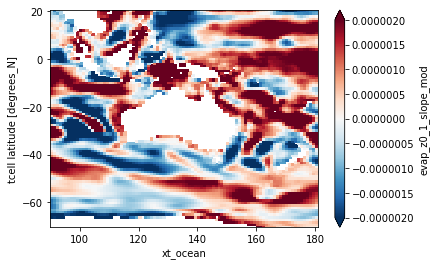

In [23]:
evap_z0_1_slope_mod.plot(vmax=0.000002)

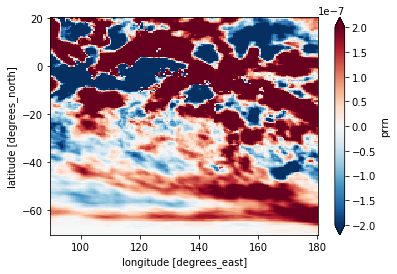

In [28]:
rain_slopes.plot(vmax=0.0000002)

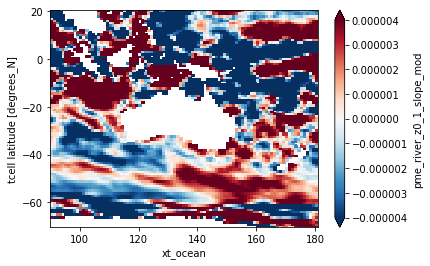

In [36]:
pme_river_z0_1_slope_mod.plot(vmax=0.000004)

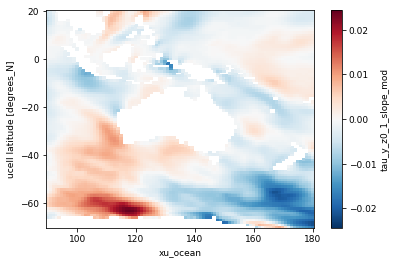

In [30]:
tau_y_z0_1_slope_mod.plot()

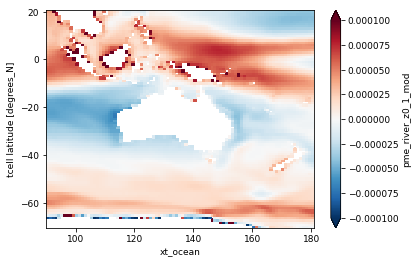

In [13]:
pme_river_z0_1_mod.plot(vmax=0.0001)

Bbox(x0=0.125, y0=0.7158695652173913, x1=0.29347826086956524, y1=0.88)
[0.125, 0.7858695652173913, 0.31097826086956526, 0.9]
Bbox(x0=0.3271739130434783, y0=0.7158695652173913, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.7858695652173913, 0.5131521739130435, 0.9]
Bbox(x0=0.5293478260869566, y0=0.7158695652173913, x1=0.6978260869565218, y1=0.88)
[0.5293478260869566, 0.7858695652173913, 0.7153260869565218, 0.9]
Bbox(x0=0.7315217391304348, y0=0.7158695652173913, x1=0.9000000000000001, y1=0.88)
[0.8215217391304348, 0.7858695652173913, 1.0075, 0.9]
Bbox(x0=0.125, y0=0.5189130434782608, x1=0.29347826086956524, y1=0.6830434782608695)
[0.125, 0.5289130434782608, 0.31097826086956526, 0.7430434782608695]
Bbox(x0=0.3271739130434783, y0=0.5189130434782608, x1=0.4956521739130435, y1=0.6830434782608695)
[0.3271739130434783, 0.5289130434782608, 0.5131521739130435, 0.7430434782608695]
Bbox(x0=0.5293478260869566, y0=0.5189130434782608, x1=0.6978260869565218, y1=0.6830434782608695)
[0.52934782

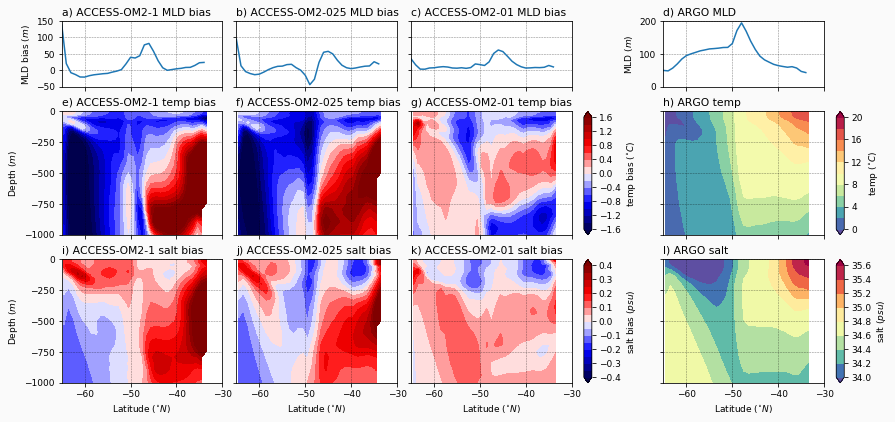

In [64]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 9})    

# plt.suptitle(
#     r'Mixed layer depth ($m$), temperature ($^{\circ}C$) and salinity ($psu$) ' +
#     '\n2004-to-2017 long term mean zonally averaged between 122$^{\circ}E$ and 138$^{\circ}E$',
#     x=0.6,y=1.02, ha='center')

row=4
col=4

ax = plt.subplot(row, col, 1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.02] 
print(pos_plot)
data = \
mld_z0_1_mod.interp(yt_ocean=mld_z0_obs.lat).mean('year')\
- mld_z0_obs.mean('year')
plot = plt.plot(data.yt_ocean, data)
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 MLD bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-50, 150, 50))
plt.ylim([-50, 150])
plt.xlim([-65,-30])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('MLD bias ($m$)')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 2)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.02] 
print(pos_plot)
data = \
mld_z0_025_mod.interp(yt_ocean=mld_z0_obs.lat).mean('year')\
- mld_z0_obs.mean('year')
plot = plt.plot(data.yt_ocean, data)
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 MLD bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-50, 150, 50))
plt.ylim([-50, 150])
plt.xlim([-65,-30])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 3)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.02] 
print(pos_plot)
data = \
mld_z0_01_mod.interp(yt_ocean=mld_z0_obs.lat).mean('year')\
- mld_z0_obs.mean('year')
plot = plt.plot(data.yt_ocean, data)
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 MLD bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-50, 150, 50))
plt.ylim([-50, 150])
plt.xlim([-65,-30])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 4)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0+0.07, pos.x1+0.1075, pos.y1+0.02] 
print(pos_plot)
data = mld_z0_obs.mean('year')
plot = plt.plot(data.lat, data)
ax.set_position(bbox(pos_plot))
ax.set_title('d) ARGO MLD', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(0, 300, 100))
plt.ylim([0, 200])
plt.xlim([-65,-30])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('MLD ($m$)')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 5)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
levels = arange(-1.6,1.6,0.2)
cmap = plt.cm.seismic
data = \
temp_xm128_1_mod.interp(yt_ocean=temp.LATITUDE).interp(st_ocean=temp.PRESSURE).mean('year')\
- temp.mean('year')
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-1 temp bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Depth ($m$)')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 6)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = \
temp_xm128_025_mod.interp(yt_ocean=temp.LATITUDE).interp(st_ocean=temp.PRESSURE).mean('year')\
- temp.mean('year')
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-025 temp bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 7)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = \
temp_xm128_01_mod.interp(yt_ocean=temp.LATITUDE).interp(st_ocean=temp.PRESSURE).mean('year')\
- temp.mean('year')
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('g) ACCESS-OM2-01 temp bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'temp bias ($^{\circ}C$)', cax=axins)

ax = plt.subplot(row, col, 8)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0+0.01, pos.x1+0.1075, pos.y1+0.06] 
print(pos_plot)
levels=arange(0,20,2)
cmap = plt.cm.Spectral_r
data = temp.mean('year')
plot = plt.contourf(data.LATITUDE, data.PRESSURE, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('h) ARGO temp', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'temp ($^{\circ}C$)', cax=axins)

ax = plt.subplot(row, col, 9)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.0175, pos.y1] 
print(pos_plot)
levels = arange(-0.4,0.4,0.05)
cmap = plt.cm.seismic
data = \
salt_xm128_1_mod.interp(yt_ocean=salt.LATITUDE).interp(st_ocean=salt.PRESSURE).mean('year')\
- salt.mean('year')
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('i) ACCESS-OM2-1 salt bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('Depth ($m$)')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 10)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = \
salt_xm128_025_mod.interp(yt_ocean=salt.LATITUDE).interp(st_ocean=salt.PRESSURE).mean('year')\
- salt.mean('year')
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('j) ACCESS-OM2-025 salt bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 11)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+-0.05, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = \
salt_xm128_01_mod.interp(yt_ocean=salt.LATITUDE).interp(st_ocean=salt.PRESSURE).mean('year')\
- salt.mean('year')
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('k) ACCESS-OM2-01 salt bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'salt bias ($psu$)', cax=axins)

ax = plt.subplot(row, col, 12)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0-0.05, pos.x1+0.1075, pos.y1] 
print(pos_plot)
levels=arange(34,35.6,0.2)
cmap = plt.cm.Spectral_r
data = salt.mean('year') 
plot = plt.contourf(data.LATITUDE, data.PRESSURE, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('l) ARGO salt', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'salt ($psu$)', cax=axins)

savefigure('xm128_ltm')

Bbox(x0=0.125, y0=0.7158695652173913, x1=0.29347826086956524, y1=0.88)
[0.125, 0.7858695652173913, 0.31097826086956526, 0.94]
Bbox(x0=0.3271739130434783, y0=0.7158695652173913, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.7858695652173913, 0.5131521739130435, 0.94]
Bbox(x0=0.5293478260869566, y0=0.7158695652173913, x1=0.6978260869565218, y1=0.88)
[0.5293478260869566, 0.7858695652173913, 0.7153260869565218, 0.94]
Bbox(x0=0.125, y0=0.5189130434782608, x1=0.29347826086956524, y1=0.6830434782608695)
[0.125, 0.5889130434782608, 0.31097826086956526, 0.7430434782608695]
Bbox(x0=0.3271739130434783, y0=0.5189130434782608, x1=0.4956521739130435, y1=0.6830434782608695)
[0.3271739130434783, 0.5889130434782608, 0.5131521739130435, 0.7430434782608695]
Bbox(x0=0.5293478260869566, y0=0.5189130434782608, x1=0.6978260869565218, y1=0.6830434782608695)
[0.5293478260869566, 0.5889130434782608, 0.7153260869565218, 0.7430434782608695]
Bbox(x0=0.7315217391304348, y0=0.5189130434782608, x1=0.90000000

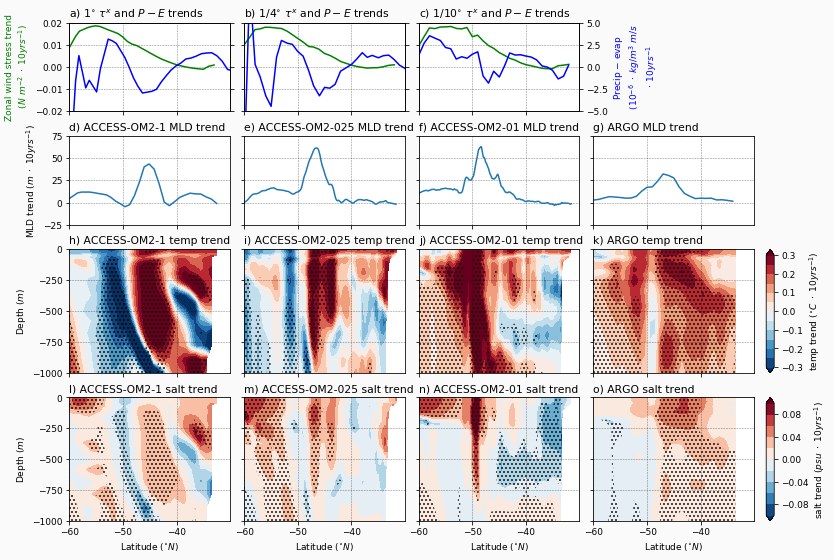

In [81]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 9})    

# plt.suptitle(
#     r'Mixed layer depth ($m$), temperature ($^{\circ}C$) and salinity ($psu$) ' +
#     '\n2004-to-2017 decadal trend zonally averaged between 122$^{\circ}E$ and 138$^{\circ}E$',
#     x=0.5,y=1.02, ha='center')

row=4
col=4

lonW = 122
lonE = 138
latN = -30
latS = -70

ax = plt.subplot(row, col, 1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
data = tau_x_z0_1_slope_mod.sel(yu_ocean=slice(latS,latN)).sel(xu_ocean=slice(lonW,lonE)).mean('xu_ocean')
plot = ax.plot(data.yu_ocean, data, 'g-')
ax2 = ax.twinx()
data = -pme_river_z0_1_slope_mod.sel(yt_ocean=slice(latS,latN)).sel(xt_ocean=slice(lonW,lonE)).mean('xt_ocean')*10**6
plot = ax2.plot(data.yt_ocean+5, data, 'b-')
ax.set_ylim([-0.02, 0.02])
ax2.set_ylim([-5, 5])
ax.set_position(bbox(pos_plot))
ax.set_title(r'a) $1^{\circ}$ $\tau^x$ and $P-E$ trends', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-70, -40, 10))
# ax.set_yticks(arange(-25, 75, 25))
# plt.ylim([-25, 75])
plt.xlim([-60,-30])
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Zonal wind stress trend\n ($N\ m^{-2}\ \cdot\ 10yrs^{-1}$)', color='g')
ax2.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 2)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
data = tau_x_z0_025_slope_mod.sel(yu_ocean=slice(latS,latN)).sel(xu_ocean=slice(lonW,lonE)).mean('xu_ocean')
plot = ax.plot(data.yu_ocean, data, 'g-')
ax2 = ax.twinx()
data = -pme_river_z0_025_slope_mod.sel(yt_ocean=slice(latS,latN)).sel(xt_ocean=slice(lonW,lonE)).mean('xt_ocean')*10**6
plot = ax2.plot(data.yt_ocean+5, data, 'b-')
# ax.set_yticks(color='g')
# ax2.set_yticks(color='b')
ax.set_ylim([-0.02, 0.02])
ax2.set_ylim([-5, 5])
ax.set_position(bbox(pos_plot))
ax.set_title(r'b) $1/4^{\circ}$ $\tau^x$ and $P-E$ trends', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-70, -40, 10))
# ax.set_yticks(arange(-25, 75, 25))
# plt.ylim([-25, 75])
plt.xlim([-60,-30])
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax2.set_ylabel('')
ax.set_yticklabels('')
ax2.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 3)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
data = tau_x_z0_01_slope_mod.sel(yu_ocean=slice(latS,latN)).sel(xu_ocean=slice(lonW,lonE)).mean('xu_ocean')
plot = ax.plot(data.yu_ocean, data, 'g-')
ax2 = ax.twinx()
data = -pme_river_z0_01_slope_mod.sel(yt_ocean=slice(latS,latN)).sel(xt_ocean=slice(lonW,lonE)).mean('xt_ocean')*10**6
plot = ax2.plot(data.yt_ocean, data, 'b-')
# ax.set_yticks(color='g')
# ax2.set_yticks(color='b')
ax.set_ylim([-0.02, 0.02])
ax2.set_ylim([-5, 5])
ax.set_position(bbox(pos_plot))
ax.set_title(r'c) $1/10^{\circ}$ $\tau^x$ and $P-E$ trends', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-70, -40, 10))
# ax.set_yticks(arange(-25, 75, 25))
# plt.ylim([-25, 75])
plt.xlim([-60,-30])
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax2.set_ylabel('Precip $-$ evap\n ($10^{-6}\ \cdot\ kg/m^{3}\ m/s$\n $\cdot\ 10yrs^{-1}$', color='b')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 5)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
data = mld_z0_1_slope_mod
plot = plt.plot(data.yt_ocean, data)
ax.set_position(bbox(pos_plot))
ax.set_title('d) ACCESS-OM2-1 MLD trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-70, -40, 10))
ax.set_yticks(arange(-25, 75, 25))
plt.ylim([-25, 75])
plt.xlim([-60,-30])
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('MLD trend ($m\ \cdot\ 10yrs^{-1}$)')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 6)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
data = mld_z0_025_slope_mod
plot = plt.plot(data.yt_ocean, data)
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-025 MLD trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-70, -40, 10))
ax.set_yticks(arange(-25, 75, 25))
plt.ylim([-25, 75])
plt.xlim([-60,-30])
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 7)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
data = mld_z0_01_slope_mod
plot = plt.plot(data.yt_ocean, data)
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-01 MLD trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-70, -40, 10))
ax.set_yticks(arange(-25, 75, 25))
plt.ylim([-25, 75])
plt.xlim([-60,-30])
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 8)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
data = mld_z0_slope_obs
plot = plt.plot(data.lat, data)
ax.set_position(bbox(pos_plot))
ax.set_title('g) ARGO MLD trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-70, -40, 10))
ax.set_yticks(arange(-25, 75, 25))
plt.ylim([-25, 75])
plt.xlim([-60,-30])
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 9)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
levels=arange(-0.3,0.3,0.05)
cmap = plt.cm.RdBu_r
data = temp_xm128_1_slope_mod
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_xm128_1_p_value_mod
plot2 = plt.contourf(data.yt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('h) ACCESS-OM2-1 temp trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Depth ($m$)')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 10)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = temp_xm128_025_slope_mod
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_xm128_025_p_value_mod
plot2 = plt.contourf(data.yt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('i) ACCESS-OM2-025 temp trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 11)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = temp_xm128_01_slope_mod
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_xm128_01_p_value_mod
plot2 = plt.contourf(data.yt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('j) ACCESS-OM2-01 temp trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 12)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
# levels=arange(0,20,2)
# cmap = plt.cm.Spectral_r
data = temp_slope
plot = plt.contourf(data.lat, data.depth, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_p_value
plot2 = plt.contourf(data.lat, data.depth, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('k) ARGO temp trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'temp trend ($^{\circ}C\ \cdot\ 10yrs^{-1}$)', cax=axins)

ax = plt.subplot(row, col, 13)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.0175, pos.y1] 
print(pos_plot)
levels=arange(-0.1,0.1,0.02)
cmap = plt.cm.RdBu_r
data = salt_xm128_1_slope_mod
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = salt_xm128_1_p_value_mod
plot2 = plt.contourf(data.yt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('l) ACCESS-OM2-1 salt trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('Depth ($m$)')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 14)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = salt_xm128_025_slope_mod
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = salt_xm128_025_p_value_mod
plot2 = plt.contourf(data.yt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('m) ACCESS-OM2-025 salt trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 15)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = salt_xm128_01_slope_mod
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = salt_xm128_01_p_value_mod
plot2 = plt.contourf(data.yt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('n) ACCESS-OM2-01 salt trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 16)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,20,2)
# cmap = plt.cm.Spectral_r
data = salt_slope
plot = plt.contourf(data.lat, data.depth, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = salt_p_value
plot2 = plt.contourf(data.lat, data.depth, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('o) ARGO salt trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'salt trend ($psu\ \cdot\ 10yrs^{-1}$)', cax=axins)

savefigure('xm128_trend')